# Assignment 1, January 2026

Objective:  Learn plotting, writing functions, derivatives.

Note that the derivative you define in part 8 of this question should be the "go to" numerical derivative, that you should use throughout the course when asked to find the derivative of a function.


## 1.  Write a python function $y(x)=3x\sin(1+x)$ and then plot it from 0 to 6.

Text(0, 0.5, 'y')

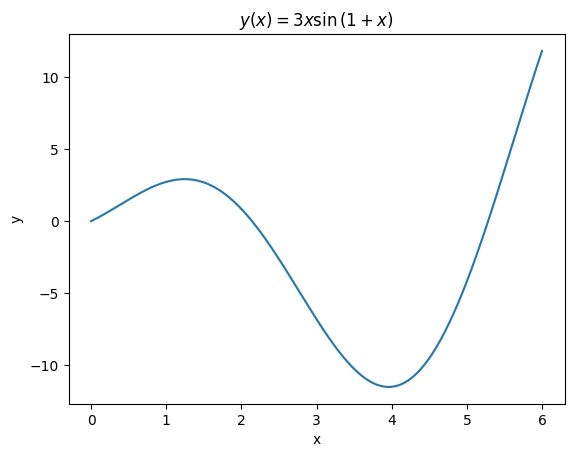

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return 3*x*np.sin(1+x)

xrange=np.linspace(0,6,200)
plt.plot(xrange,y(xrange))
plt.title(r'$y(x)=3x\sin{(1+x)}$')
plt.xlabel("x")
plt.ylabel("y")

## 2.  Write the python function $f(x)=2\sin^3 x-5\cos\frac{3x}{2}+1$' and plot it from 0 to $\pi$.

Text(0, 0.5, 'y')

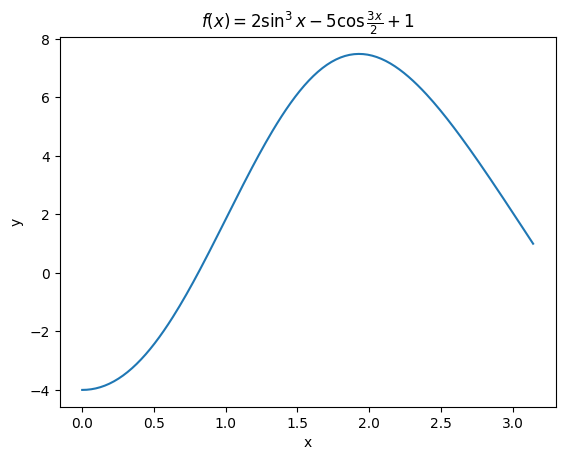

In [29]:
def f(x):
    return 2*np.sin(x)**3-5*np.cos(3/2*x)+1

xrange=np.linspace(0,np.pi,200)
plt.plot(xrange,f(xrange))
plt.title(r'$f(x)=2\sin^3 x-5\cos\frac{3x}{2}+1$')
plt.xlabel("x")
plt.ylabel("y")


## 3. Use the derivative rules from calculus to find the analytic form of the derivative $f'$ of the function used in question 2. 

Text(0, 0.5, 'y')

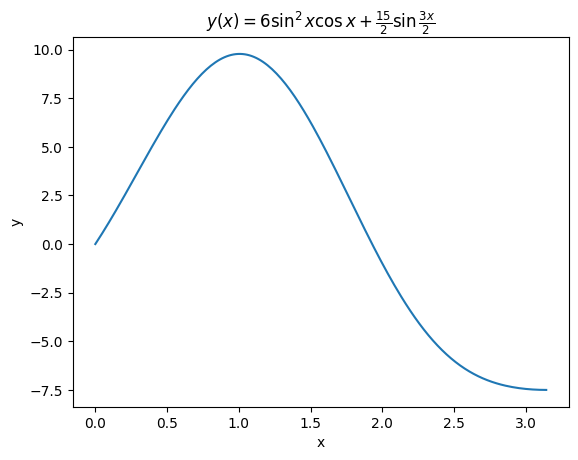

In [27]:
def fprime(x):
    return 6*np.sin(x)**2*np.cos(x)+15/2*np.sin(3*x/2)

plt.plot(xrange,fprime(xrange))
plt.title(r'$y(x)=6\sin^2x\cos x+\frac{15}{2}\sin\frac{3x}{2}$')
plt.xlabel("x")
plt.ylabel("y")

## 4.  Complete the code below to define a function $h(x,g)=g^2-1$, which takes as input the name of a function $g$ which is a function of x.  This is a function of a function.  One of the nice things about python is that a function is "just a variable" so you can use the name of a function as an argument.  Apply your function to the function $y$ in question 1 and and $f$ from question 2, and plot $h(y)$ and $h(f)$ between 0 and 2$\pi$. Make a single plot with a legend that labels the two curves.

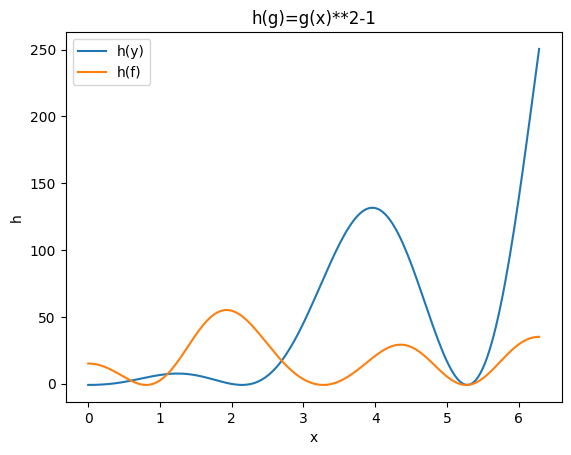

In [33]:
def h(x,g):
    return g(x)**2-1

xrange=np.linspace(0,2*np.pi,200)
plt.plot(xrange,h(xrange,y),label='h(y)')
plt.plot(xrange,h(xrange,f),label='h(f)')
plt.title('h(g)=g(x)**2-1')
plt.xlabel('x')
plt.ylabel('h')
plt.legend()
plt.show()


## 5.  Write a function that calculates the derivative numerically using the one-sided rule: 

$$d1(x)=\frac{df}{dx}=\frac {f(x+\delta)-f(x)}{\delta}$$

Call the function d1, and make it take 3 arguments d1(x,f,delta=1e-5), where x is arraylike and contains the values where the function should be evaluated, f is an arbitrary function, and delta is the step that is used to evaluate the derivative, which defaults to 1e-5. (Note that we use the "function of a function" construction that we introduced in question 4).

Plot (separately) d1(x,f,1e-5) and d1(x,f,1e-5)-f'(x) over the region from 0 to $\pi$, with $f$ and $f'$ defined in questions 2 and 3. 

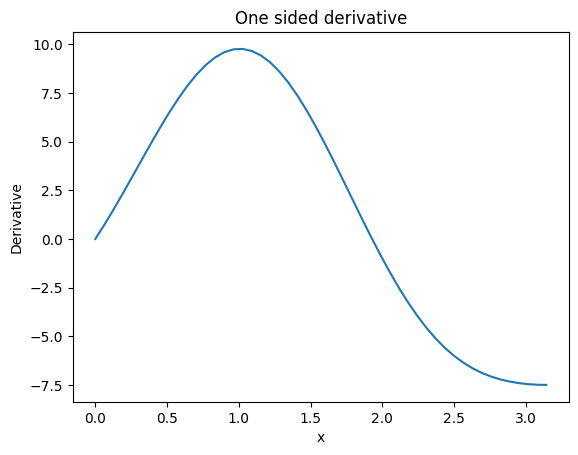

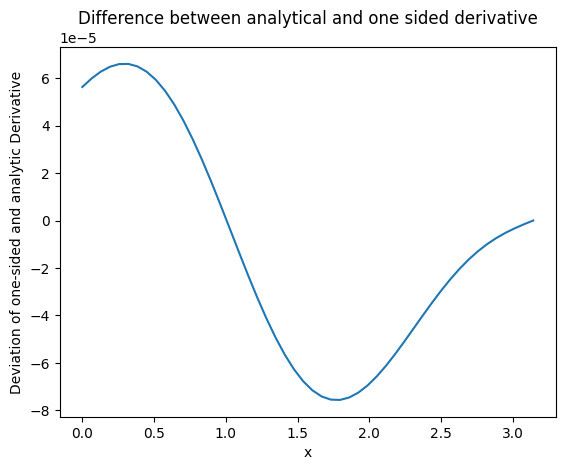

In [34]:
def d1(x,f,delta):
    return(f(x+delta)-f(x))/delta

xrange=np.linspace(0,np.pi)
plt.plot(xrange,d1(xrange,f,1e-5))
plt.title('One sided derivative')
plt.xlabel("x")
plt.ylabel("Derivative")
plt.show()
plt.title('Difference between analytical and one sided derivative')
plt.xlabel("x")
plt.ylabel("Deviation of one-sided and analytic Derivative")
plt.plot(xrange,d1(xrange,f,1e-5)-fprime(xrange))
plt.show()



## 6.  Write a second function using the symmetrical rule:  

$$d2(x)=\frac{df}{dx}=\frac {f(x+\delta)-f(x-\delta)}{2\delta}$$

Plot (separately) d2(x,f,1e-5) and d2(x,f,1e-5)-f'(x) over the region from 0 to $\pi.$ 

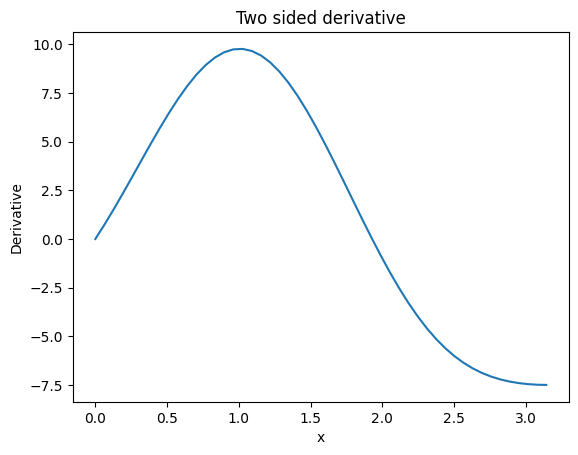

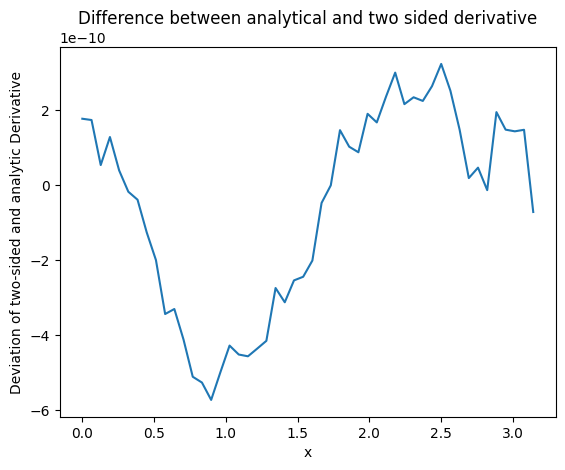

In [35]:
def d2(x,f,delta):
    return (f(x+delta)-f(x-delta))/(2*delta)

plt.plot(xrange,d2(xrange,f,1e-5))
plt.title('Two sided derivative')
plt.xlabel("x")
plt.ylabel("Derivative")
plt.show()
plt.title('Difference between analytical and two sided derivative')
plt.xlabel("x")
plt.ylabel("Deviation of two-sided and analytic Derivative")
plt.plot(xrange,d2(xrange,f,1e-5)-fprime(xrange))
plt.show()




## 7. Exactly represented numbers.  
Floating point numbers are rounded to the closest exactly representable number.  Usually we don't notice the roundoff, because we have about 16 decimal digits of precision.  But if we are subtracting numbers that are approximately equal (like when we do derivatives) the roundoff can become important.
Consider the expression $(1+x)-1$; mathematically this should just be $x$.  However, the computer rounds off 1+x, and then when we subtract 1 we can get a number different from x, except for specific values of x that are called the *xxactly represented numbers*. 

Define a function $d(x)=(1+x)-1$ and plot it on a logarithmic x-axis between $10^{-17}$ and $10^{-14}.$ To get a logarithmic list of x-values use the np.logspace method. 
The exactly represented values are the y-values on this plot. 
Print out x for the smallest 10 exactly representations of 1+x. np.unique() might be useful.   

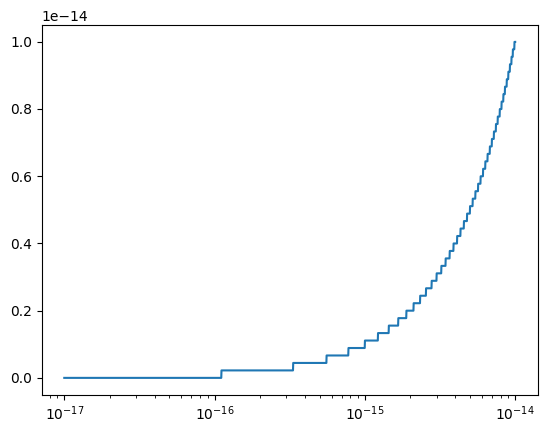

The exactly represented numbers close to 1 are 1+ [0.00000000e+00 2.22044605e-16 4.44089210e-16 6.66133815e-16
 8.88178420e-16 1.11022302e-15 1.33226763e-15 1.55431223e-15
 1.77635684e-15 1.99840144e-15]


In [80]:
def d(x):
    return ((1+x)-1)


dlist=np.logspace(-17,-14,2000)

plt.plot(dlist,d(dlist))
plt.xscale('log')
#plt.yscale('log')
plt.show()

print('The exactly represented numbers close to 1 are 1+',np.unique(d(dlist))[:10])
    

## 8.  Write a derivative function that forces the denominator to be an exactly representable number:

$x1=x+\delta$, $x2=x-\delta$, $$d3(x)=\frac{df}{dx}=\frac {f(x1)-f(x2)}{x1-x2}$$, 

since this removes numerical inaccuracy in the x values.  

Plot (separately) d3(x,f,1e-5) and d3(x,f,1e-5)-f'(x) over the region from 0 to $\pi.$ 

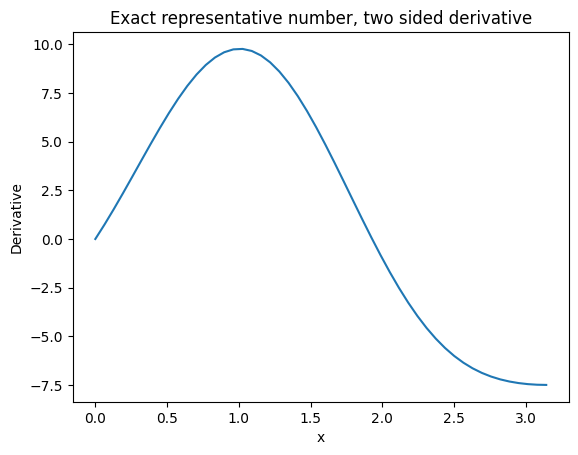

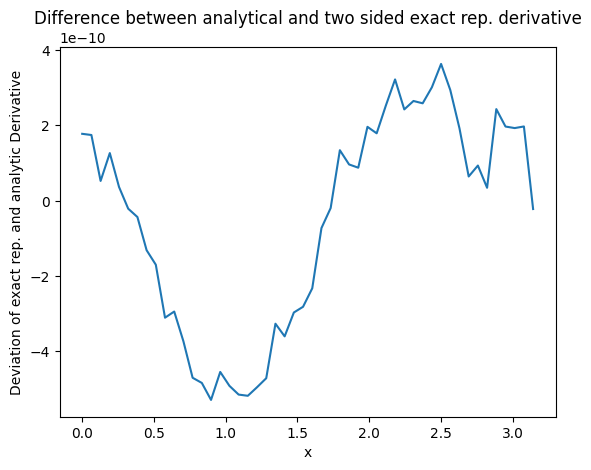

In [81]:
def d3(x,f,delta):
    xp=x+delta
    xm=x-delta
    return (f(xp)-f(xm))/(xp-xm)

plt.plot(xrange,d3(xrange,f,1e-5))
plt.title('Exact representative number, two sided derivative')
plt.xlabel("x")
plt.ylabel("Derivative")
plt.show()
plt.title('Difference between analytical and two sided exact rep. derivative')
plt.xlabel("x")
plt.ylabel("Deviation of exact rep. and analytic Derivative")
plt.plot(xrange,d3(xrange,f,1e-5)-fprime(xrange))
plt.show()


## 9.  Compare the performance of the three numerical integrals.

Write a function deviation(delta, derivative=d1) that calculates the RMS (root mean square) of the difference between the analytic function fprime and derivative (which can be any one of d1, d2, d3) as a function of delta.

The RMS,R, is defined by: $$R=\sqrt{\sum_{i=0}^{N-1} \frac{1}{N}\left( f'(x_i) - d(x_i,f,\delta)\right)^2}$$

$$x_i=\frac{i}{N}\pi.$$  

You can get an array, that contains all the $x_i$ conveniently with the np.linspace function.  Pick $N=100.$

Now plot, on a single log-log plot the RMS of all three derivatives versus delta, letting delta vary from 1e-12 to 1e-3.  (The np.logspace function will let you do this).  

The python "list comprehension" [f(x) for x in array] is a very handy construct, that will allow you to calculate y values for each x, which you can then plot.  

Which derivative is best?  Why do smaller delta's lead to less precise values of the derivative? 

Finally, this type of testing is a case where analytic solutions are useful- we can trust that mathematically they are the proper derivative, and so we can use them to test our algorithms.

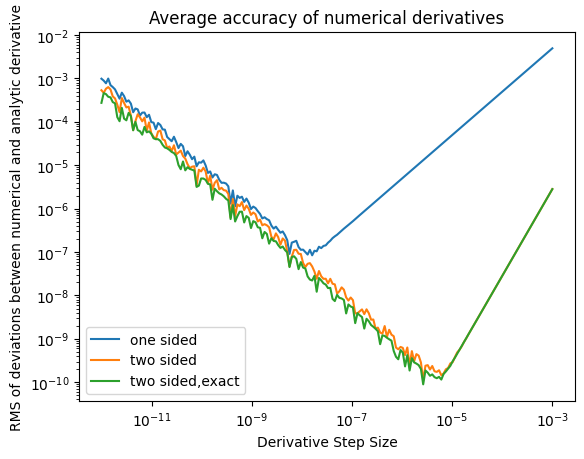

In [82]:
def deviations(delta, derivative=d1,xmin=0,xmax=np.pi):
    N=100
    xrange=np.linspace(xmin,xmax,N,endpoint=False)
    return np.sqrt(np.sum((fprime(xrange)-derivative(xrange,f,delta))**2/N))
    
dlist=np.logspace(-12,-3,200)
plt.plot(dlist,[deviations(d,d1) for d in dlist],label='one sided')
plt.plot(dlist,[deviations(d,d2) for d in dlist],label='two sided')
plt.plot(dlist,[deviations(d,d3) for d in dlist],label='two sided,exact')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Average accuracy of numerical derivatives")
plt.xlabel("Derivative Step Size")
plt.ylabel("RMS of deviations between numerical and analytic derivative")
plt.show()

# One should always use the two sided derivative with a step size around 5e-6. Exact representation improves things by a small factor.
# Smaller deltas lead to less precise derivatives because numerical precision becomes important. 



(50,)